In [81]:
import librosa
from librosa import feature
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [82]:
def extract_features(file):

    # check if normal or abnormal
    if 'abnormal' in file:
        operation=1
    else:
        operation=0
    # loading the file, getting y and sr (sample rate)

    y, sr = librosa.load(file)

    # Getting S and phase

    S, phase = librosa.magphase(librosa.stft(y=y))

    # Features for the DataFrame
# chroma features have pitch which is probably not usefull
    chroma_stft = np.mean(librosa.feature.chroma_stft(y=y, sr=sr))

    chroma_cqt = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr))

    chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr))
# to do
    melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, S=S))
    melspectrogram_min = np.min(librosa.feature.melspectrogram(y=y, sr=sr, S=S))
    melspectrogram_max = np.max(librosa.feature.melspectrogram(y=y, sr=sr, S=S))
    melspectrogram_sum = librosa.feature.melspectrogram(y=y, sr=sr, S=S).sum()
    melspectrogram_corr= np.mean(np.corrcoef(librosa.feature.melspectrogram(y=y, sr=sr, S=S)))
    melspectrogram_std= np.std(librosa.feature.melspectrogram(y=y, sr=sr, S=S))
# to check This feature is one of the most important method to extract a feature of an audio signal and is 
#used majorly whenever working on audio signals. The mel frequency cepstral coefficients (MFCCs) of a signal 
#are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral 
#envelope.
    
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr))
#rms when plotted similarities with melspectorgram
#normal rms mean higher than abnormal?
    rms = np.mean(librosa.feature.rms(y=y, S=S))
#spectral centroid computes weighted mean of the frequencies in the sound
#plot is line on melspectogram
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr, S=S))
#Bandwidth(blue zone) is the difference between the upper and lower frequencies in a continuous band of frequencies
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr, S=S))
#needs further investigation, but makes continous data discrete in bins
    spectral_contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr, S=S))
#Spectral flatness (or tonality coefficient) is a measure to quantify how much noise-like a sound is, as opposed to
#being tone-like 1. A high spectral flatness (closer to 1.0) indicates the spectrum is similar to white noise. 
#It is often converted to decibel.
    spectral_flatness = np.mean(librosa.feature.spectral_flatness(y=y, S=S))
#The roll-off frequency is defined for each frame as the center frequency for a spectrogram bin such that at 
#least roll_percent (0.85 by default) of the energy of the spectrum in this frame is contained in this bin and 
#he bins below. This can be used to, e.g., approximate the maximum (or minimum) frequency by setting roll_percent 
#to a value close to 1 (or 0).
#rolloff with rolloff coefficient 0.01 seems to be the same for (ab)normal
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr, S=S))
#Get coefficients of fitting an nth-order polynomial to the columns of a spectrogram
    poly_features = np.mean(librosa.feature.poly_features(y=y, sr=sr, S=S))
#probably chroma
    tonnetz = np.mean(librosa.feature.tonnetz(y=y, sr=sr))
#normal has higher zero crossing rate?
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y=y))
#divide in frequency bands could give more information bout difference normal and abnormal (BPM)
    #tempo = librosa.beat.tempo(onset_envelope=oenv, sr=sr,
                       #    hop_length=hop_length)[0]
    # putting them into a dataframe
    y_harmonic, y_percussive = librosa.effects.hpss(y)
    return pd.DataFrame({ 'melspectrogram' : [melspectrogram],'melspectrogram_min':[melspectrogram_min],
                             'melspectrogram_max':[melspectrogram_max], 'melspectrogram_sum':[melspectrogram_sum],
                             'melspectrogram_corr':[melspectrogram_corr] ,'melspectrogram_std':[melspectrogram_std] ,
                             'mfcc' : [mfcc], 'rms' : [rms],
                            'spectral_centroid' : [spectral_centroid], 'spectral_bandwidth' : [spectral_bandwidth],
                            'spectral_contrast' : [spectral_contrast], 'spectral_flatness ' : [spectral_flatness],
                            'spectral_rolloff' : [spectral_rolloff], 
                            'zero_crossing_rate' : [zero_crossing_rate],"mean harm": np.mean(y_harmonic),
                            "mean perc": [np.mean(y_percussive)],"max harm":[np.max(y_harmonic)],"max perc": [np.max(y_percussive)],
                             "min harm":[np.min(y_harmonic)], "min perc":[np.min(y_percussive)], 'normal(0)/abnormal(1)':[operation]})

In [83]:
import os
import sys
import time
def create_csv(machine)
    # start measuring excecution time
    start_time = time.time()
    #create empty list that will be filled with pathnames
    #find paths normal wav files
    list_normal_6 = []
    num=[0,2,4,6]
    for i in num:
        directory_normal_6 = f"/home/regis/Desktop/Sound Project/files/{machine}/6_dB_{machine}/{machine}/id_0{i}/normal/"
        for filename in os.listdir(directory_normal_6):
            file = f"{directory_normal_6}{filename}"
            list_normal_6.append(file)
    list_normal_6.sort()
    #find paths abnormal wav files
    list_abnormal_6 = []
    num=[0,2,4,6]
    for i in num:
        directory_abnormal_6 = f"/home/regis/Desktop/Sound Project/files/{machine}/6_dB_{machine}/{machine}/id_0{i}/abnormal/"
        for filename in os.listdir(directory_abnormal_6):
            file = f"{directory_abnormal_6}{filename}"
            list_abnormal_6.append(file)
    list_abnormal_6.sort()
    #add normal to df
    for wav_file in list_normal_6:
        df = extract_features(wav_file)
        if wav_file == list_normal_6[0]:
            df.to_csv(f'Librosa_features_{machine}.csv')
        else:
            df.to_csv(f'Librosa_features_{machine}.csv', mode='a', header=False)
    #add abnormal to df
    for wav_file in list_abnormal_6:
        df = extract_features(wav_file)
        df.to_csv(f'Librosa_features_{machine}.csv', mode='a', header=False) 
    print("--- %s seconds ---" % (time.time() - start_time))

--- 4516.273422718048 seconds ---


In [84]:
list_normal_6

['/home/regis/Desktop/Sound Project/files/valve/6_dB_valve/valve/id_00/normal/00000000.wav',
 '/home/regis/Desktop/Sound Project/files/valve/6_dB_valve/valve/id_00/normal/00000001.wav',
 '/home/regis/Desktop/Sound Project/files/valve/6_dB_valve/valve/id_00/normal/00000002.wav',
 '/home/regis/Desktop/Sound Project/files/valve/6_dB_valve/valve/id_00/normal/00000003.wav',
 '/home/regis/Desktop/Sound Project/files/valve/6_dB_valve/valve/id_00/normal/00000004.wav',
 '/home/regis/Desktop/Sound Project/files/valve/6_dB_valve/valve/id_00/normal/00000005.wav',
 '/home/regis/Desktop/Sound Project/files/valve/6_dB_valve/valve/id_00/normal/00000006.wav',
 '/home/regis/Desktop/Sound Project/files/valve/6_dB_valve/valve/id_00/normal/00000007.wav',
 '/home/regis/Desktop/Sound Project/files/valve/6_dB_valve/valve/id_00/normal/00000008.wav',
 '/home/regis/Desktop/Sound Project/files/valve/6_dB_valve/valve/id_00/normal/00000009.wav',
 '/home/regis/Desktop/Sound Project/files/valve/6_dB_valve/valve/id_00

In [85]:
valve=pd.read_csv('/home/regis/Desktop/Sound Project/Codit-project-main/Librosa_features.csv')

In [86]:
valve.head()

,Unnamed: 0,melspectrogram,melspectrogram_min,melspectrogram_max,melspectrogram_sum,melspectrogram_corr,melspectrogram_std,mfcc,rms,spectral_centroid,...,spectral_flatness,spectral_rolloff,zero_crossing_rate,mean harm,mean perc,max harm,max perc,min harm,min perc,normal(0)/abnormal(1)
0,0,0.006300,6.218734e-10,0.090277,347.580261,0.523183,0.010437,-15.342528,0.002967,1399.372425,...,0.000852,2847.104130,0.060725,-3.781356e-07,4.012865e-07,0.006918,0.070441,-0.006861,-0.060939,0
1,0,0.007236,7.803309e-10,0.087623,399.178070,0.461858,0.009354,-14.877153,0.002920,1765.622412,...,0.001012,3777.878084,0.094482,-1.201143e-07,-3.884470e-07,0.006952,0.070928,-0.006763,-0.060128,0
2,0,0.006186,6.056689e-10,0.092516,341.284851,0.494020,0.008715,-16.809891,0.002680,1716.821280,...,0.000950,3394.926803,0.094802,-3.535212e-07,-4.008645e-07,0.007342,0.070832,-0.007282,-0.060499,0
3,0,0.006994,6.636679e-10,0.097133,385.858826,0.489502,0.009895,-15.353941,0.002953,1466.548926,...,0.000681,3035.257362,0.071383,-1.655043e-09,-1.397088e-07,0.006073,0.073961,-0.005455,-0.060447,0
4,0,0.005965,5.532336e-10,0.119931,329.072296,0.520290,0.010416,-15.100811,0.002925,1267.393978,...,0.000508,2481.789092,0.053385,-7.166033e-07,1.267004e-07,0.006912,0.070822,-0.006740,-0.063913,0


In [87]:
valve.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [88]:
valve.columns

Index(['melspectrogram', 'melspectrogram_min', 'melspectrogram_max',
       'melspectrogram_sum', 'melspectrogram_corr', 'melspectrogram_std',
       'mfcc', 'rms', 'spectral_centroid', 'spectral_bandwidth',
       'spectral_contrast', 'spectral_flatness ', 'spectral_rolloff',
       'zero_crossing_rate', 'mean harm', 'mean perc', 'max harm', 'max perc',
       'min harm', 'min perc', 'normal(0)/abnormal(1)'],
      dtype='object')

In [89]:
valve.head()

,melspectrogram,melspectrogram_min,melspectrogram_max,melspectrogram_sum,melspectrogram_corr,melspectrogram_std,mfcc,rms,spectral_centroid,spectral_bandwidth,...,spectral_flatness,spectral_rolloff,zero_crossing_rate,mean harm,mean perc,max harm,max perc,min harm,min perc,normal(0)/abnormal(1)
0,0.006300,6.218734e-10,0.090277,347.580261,0.523183,0.010437,-15.342528,0.002967,1399.372425,1635.526256,...,0.000852,2847.104130,0.060725,-3.781356e-07,4.012865e-07,0.006918,0.070441,-0.006861,-0.060939,0
1,0.007236,7.803309e-10,0.087623,399.178070,0.461858,0.009354,-14.877153,0.002920,1765.622412,1767.165689,...,0.001012,3777.878084,0.094482,-1.201143e-07,-3.884470e-07,0.006952,0.070928,-0.006763,-0.060128,0
2,0.006186,6.056689e-10,0.092516,341.284851,0.494020,0.008715,-16.809891,0.002680,1716.821280,1784.159467,...,0.000950,3394.926803,0.094802,-3.535212e-07,-4.008645e-07,0.007342,0.070832,-0.007282,-0.060499,0
3,0.006994,6.636679e-10,0.097133,385.858826,0.489502,0.009895,-15.353941,0.002953,1466.548926,1585.731245,...,0.000681,3035.257362,0.071383,-1.655043e-09,-1.397088e-07,0.006073,0.073961,-0.005455,-0.060447,0
4,0.005965,5.532336e-10,0.119931,329.072296,0.520290,0.010416,-15.100811,0.002925,1267.393978,1510.835471,...,0.000508,2481.789092,0.053385,-7.166033e-07,1.267004e-07,0.006912,0.070822,-0.006740,-0.063913,0


In [90]:
valve.dtypes

melspectrogram           float64
melspectrogram_min       float64
melspectrogram_max       float64
melspectrogram_sum       float64
melspectrogram_corr      float64
melspectrogram_std       float64
mfcc                     float64
rms                      float64
spectral_centroid        float64
spectral_bandwidth       float64
spectral_contrast        float64
spectral_flatness        float64
spectral_rolloff         float64
zero_crossing_rate       float64
mean harm                float64
mean perc                float64
max harm                 float64
max perc                 float64
min harm                 float64
min perc                 float64
normal(0)/abnormal(1)      int64
dtype: object

In [91]:
valve.shape

(4170, 21)

Decision trees are very easy as compared to the random forest. A decision tree combines some decisions, whereas a random forest combines several decision trees. Thus, it is a long process, yet slow.

Whereas, a decision tree is fast and operates easily on large data sets, especially the linear one. The random forest model needs rigorous training. When you are trying to put up a project, you might need more than one model. Thus, a large number of random forests, more the time. 

It depends on your requirements. If you have less time to work on a model, you are bound to choose a decision tree. However, stability and reliable predictions are in the basket of random forests. 

## Random Forest

In [92]:
y=valve['normal(0)/abnormal(1)'].values
x=valve.drop(columns=['normal(0)/abnormal(1)'], axis=1)

In [93]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [94]:
x.head()

,melspectrogram,melspectrogram_min,melspectrogram_max,melspectrogram_sum,melspectrogram_corr,melspectrogram_std,mfcc,rms,spectral_centroid,spectral_bandwidth,spectral_contrast,spectral_flatness,spectral_rolloff,zero_crossing_rate,mean harm,mean perc,max harm,max perc,min harm,min perc
0,0.006300,6.218734e-10,0.090277,347.580261,0.523183,0.010437,-15.342528,0.002967,1399.372425,1635.526256,21.795884,0.000852,2847.104130,0.060725,-3.781356e-07,4.012865e-07,0.006918,0.070441,-0.006861,-0.060939
1,0.007236,7.803309e-10,0.087623,399.178070,0.461858,0.009354,-14.877153,0.002920,1765.622412,1767.165689,21.547031,0.001012,3777.878084,0.094482,-1.201143e-07,-3.884470e-07,0.006952,0.070928,-0.006763,-0.060128
2,0.006186,6.056689e-10,0.092516,341.284851,0.494020,0.008715,-16.809891,0.002680,1716.821280,1784.159467,23.085971,0.000950,3394.926803,0.094802,-3.535212e-07,-4.008645e-07,0.007342,0.070832,-0.007282,-0.060499
3,0.006994,6.636679e-10,0.097133,385.858826,0.489502,0.009895,-15.353941,0.002953,1466.548926,1585.731245,21.018282,0.000681,3035.257362,0.071383,-1.655043e-09,-1.397088e-07,0.006073,0.073961,-0.005455,-0.060447
4,0.005965,5.532336e-10,0.119931,329.072296,0.520290,0.010416,-15.100811,0.002925,1267.393978,1510.835471,21.688802,0.000508,2481.789092,0.053385,-7.166033e-07,1.267004e-07,0.006912,0.070822,-0.006740,-0.063913


In [95]:
#Choosing 80% as training data.
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [96]:
xTrain.shape

(3336, 20)

should we standardise or normalize or nothing?

Thanks for the clarification by commenting. Tree-based models do not care about the absolute value that a feature takes. They only care about the order of the values. Hence, normalization is used mainly in linear models/knn/neural networks because they're affected by absolute values taken by features.

You don't need to normalize/standardize.

In [97]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, random_state = 0)
classifier.fit(xTrain, yTrain)
y_pred = classifier.predict(xTest)

check what metrics most important

In [115]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('confusion matrix')
print(confusion_matrix(yTest, y_pred))
print('classification report')
print(classification_report(yTest, y_pred))
print('accuracy score')
print(accuracy_score(yTest, y_pred))

confusion matrix
[[740   5]
 [ 34  55]]
classification report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       745
           1       0.92      0.62      0.74        89

    accuracy                           0.95       834
   macro avg       0.94      0.81      0.86       834
weighted avg       0.95      0.95      0.95       834

accuracy score
0.9532374100719424


In [118]:
834-(834*0.9532374100719424)

39.0

In [100]:
valve.shape

(4170, 21)

In [101]:
y_pred.shape

(834,)

In [103]:
yTest.shape

(834,)

In [104]:
xTest.shape

(834, 20)

In [105]:
xTest.head()

,melspectrogram,melspectrogram_min,melspectrogram_max,melspectrogram_sum,melspectrogram_corr,melspectrogram_std,mfcc,rms,spectral_centroid,spectral_bandwidth,spectral_contrast,spectral_flatness,spectral_rolloff,zero_crossing_rate,mean harm,mean perc,max harm,max perc,min harm,min perc
1950,0.007732,8.076448e-10,0.240814,426.550903,0.457082,0.012411,-14.734518,0.003286,1635.399730,1842.423772,21.385414,0.000763,3744.479136,0.069911,2.848271e-08,8.708768e-07,0.007074,0.076012,-0.006702,-0.045171
3435,0.006734,7.213018e-10,0.287798,371.491241,0.517714,0.011847,-14.923219,0.003148,1684.726429,1876.092358,23.203076,0.000743,3614.780307,0.080222,3.841903e-07,5.377511e-07,0.009481,0.056683,-0.008437,-0.045473
1926,0.006793,7.308973e-10,0.228192,374.743134,0.512241,0.012651,-14.380542,0.003194,1443.349190,1803.653355,21.803495,0.000538,3164.156814,0.053194,1.425133e-06,9.915567e-07,0.007672,0.074927,-0.007106,-0.043955
1784,0.007382,7.882814e-10,0.229776,407.270752,0.489502,0.012443,-14.083639,0.003215,1501.802700,1778.906504,21.217145,0.000651,3359.254629,0.060423,-1.248084e-06,1.116918e-06,0.006814,0.072664,-0.006417,-0.047220
3970,0.005740,6.731675e-10,0.255278,316.685425,0.493568,0.012284,-14.300553,0.003079,1146.125075,1684.589994,22.052215,0.000326,2417.589171,0.037337,-6.705058e-07,-1.437777e-06,0.007507,0.068844,-0.008115,-0.042379


In [107]:
yTest

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [108]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [113]:
count=0
for i in range(len(yTest)):
    if yTest[i]!=y_pred[i]:
        count = count + 1
print(count)

39


## Feature dropping

In [155]:
x_columns=list(x.columns)

In [156]:
x_columns

['melspectrogram',
 'melspectrogram_min',
 'melspectrogram_max',
 'melspectrogram_sum',
 'melspectrogram_corr',
 'melspectrogram_std',
 'mfcc',
 'rms',
 'spectral_centroid',
 'spectral_bandwidth',
 'spectral_contrast',
 'spectral_flatness ',
 'spectral_rolloff',
 'zero_crossing_rate',
 'mean harm',
 'mean perc',
 'max harm',
 'max perc',
 'min harm',
 'min perc']

Feature: 0,	 Name: melspectrogram, 	 Score: 3.54271
Feature: 1,	 Name: melspectrogram_min, 	 Score: 9.80207
Feature: 2,	 Name: melspectrogram_max, 	 Score: 3.78305
Feature: 3,	 Name: melspectrogram_sum, 	 Score: 9.92060
Feature: 4,	 Name: melspectrogram_corr, 	 Score: 5.11850
Feature: 5,	 Name: melspectrogram_std, 	 Score: 2.93117
Feature: 6,	 Name: mfcc, 	 Score: 4.72874
Feature: 7,	 Name: rms, 	 Score: 3.04573
Feature: 8,	 Name: spectral_centroid, 	 Score: 2.25840
Feature: 9,	 Name: spectral_bandwidth, 	 Score: 2.45681
Feature: 10,	 Name: spectral_contrast, 	 Score: 2.91034
Feature: 11,	 Name: spectral_flatness , 	 Score: 2.99187
Feature: 12,	 Name: spectral_rolloff, 	 Score: 26.97188
Feature: 13,	 Name: zero_crossing_rate, 	 Score: 2.74773
Feature: 14,	 Name: mean harm, 	 Score: 16.79040


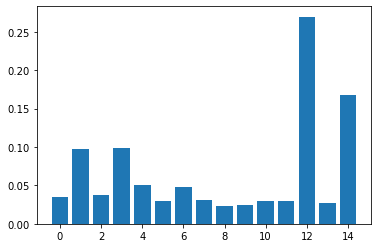

In [157]:
# get importance
importance = classifier.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print(f'Feature: %0d,\t Name: {x_columns[i]}, \t Score: %.5f' % (i,v*100))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

drop columns with values below 2%

In [158]:
x_reduced=x.drop(columns=['melspectrogram_min','spectral_centroid','spectral_rolloff','mean harm','mean perc'], axis=1)

In [159]:
#Choosing 80% as training data.
xTrain, xTest, yTrain, yTest = train_test_split(x_reduced, y, test_size = 0.2, random_state = 42)

In [160]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, random_state = 0)
classifier.fit(xTrain, yTrain)
y_pred = classifier.predict(xTest)

In [161]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('confusion matrix')
print(confusion_matrix(yTest, y_pred))
print('classification report')
print(classification_report(yTest, y_pred))
print('accuracy score')
print(accuracy_score(yTest, y_pred))

confusion matrix
[[739   6]
 [ 32  57]]
classification report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       745
           1       0.90      0.64      0.75        89

    accuracy                           0.95       834
   macro avg       0.93      0.82      0.86       834
weighted avg       0.95      0.95      0.95       834

accuracy score
0.9544364508393285


Feature: 0,	 Name: melspectrogram, 	 Score: 3.54271
Feature: 1,	 Name: melspectrogram_min, 	 Score: 9.80207
Feature: 2,	 Name: melspectrogram_max, 	 Score: 3.78305
Feature: 3,	 Name: melspectrogram_sum, 	 Score: 9.92060
Feature: 4,	 Name: melspectrogram_corr, 	 Score: 5.11850
Feature: 5,	 Name: melspectrogram_std, 	 Score: 2.93117
Feature: 6,	 Name: mfcc, 	 Score: 4.72874
Feature: 7,	 Name: rms, 	 Score: 3.04573
Feature: 8,	 Name: spectral_centroid, 	 Score: 2.25840
Feature: 9,	 Name: spectral_bandwidth, 	 Score: 2.45681
Feature: 10,	 Name: spectral_contrast, 	 Score: 2.91034
Feature: 11,	 Name: spectral_flatness , 	 Score: 2.99187
Feature: 12,	 Name: spectral_rolloff, 	 Score: 26.97188
Feature: 13,	 Name: zero_crossing_rate, 	 Score: 2.74773
Feature: 14,	 Name: mean harm, 	 Score: 16.79040


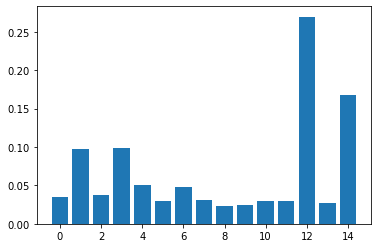

In [162]:
# get importance
importance = classifier.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print(f'Feature: %0d,\t Name: {x_columns[i]}, \t Score: %.5f' % (i,v*100))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

when dropping: 0.9544364508393285 without:0.9532374100719424 / 0.9532374100719424==> improved

In [170]:
x_reducedd=x.drop(columns=['melspectrogram_min','spectral_centroid','spectral_rolloff','mean harm','mean perc','zero_crossing_rate','melspectrogram','melspectrogram_sum','melspectrogram_std','mfcc','rms','spectral_bandwidth','spectral_contrast','spectral_flatness ','max harm','min harm'], axis=1)

In [171]:
#Choosing 80% as training data.
xTrain, xTest, yTrain, yTest = train_test_split(x_reducedd, y, test_size = 0.2, random_state = 42)

In [172]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, random_state = 0)
classifier.fit(xTrain, yTrain)
y_pred = classifier.predict(xTest)

In [173]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('confusion matrix')
print(confusion_matrix(yTest, y_pred))
print('classification report')
print(classification_report(yTest, y_pred))
print('accuracy score')
print(accuracy_score(yTest, y_pred))

confusion matrix
[[736   9]
 [ 30  59]]
classification report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       745
           1       0.87      0.66      0.75        89

    accuracy                           0.95       834
   macro avg       0.91      0.83      0.86       834
weighted avg       0.95      0.95      0.95       834

accuracy score
0.9532374100719424


Feature: 0,	 Name: melspectrogram, 	 Score: 21.02548
Feature: 1,	 Name: melspectrogram_min, 	 Score: 18.82096
Feature: 2,	 Name: melspectrogram_max, 	 Score: 39.66551
Feature: 3,	 Name: melspectrogram_sum, 	 Score: 20.48805


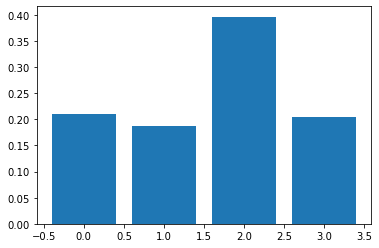

In [174]:
# get importance
importance = classifier.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print(f'Feature: %0d,\t Name: {x_columns[i]}, \t Score: %.5f' % (i,v*100))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## to reuse in necessary

In [20]:
def extract_features(file):

    # check if normal or abnormal
    if 'abnormal' in file:
        operation=1
    else:
        operation=0
    # loading the file, getting y and sr (sample rate)

    y, sr = librosa.load(file)

    # Getting S and phase

    S, phase = librosa.magphase(librosa.stft(y=y))

    # Features for the DataFrame
# chroma features have pitch which is probably not usefull
    chroma_stft = np.mean(librosa.feature.chroma_stft(y=y, sr=sr))

    chroma_cqt = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr))

    chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr))
# to do
    melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, S=S))
# to check This feature is one of the most important method to extract a feature of an audio signal and is 
#used majorly whenever working on audio signals. The mel frequency cepstral coefficients (MFCCs) of a signal 
#are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral 
#envelope.

    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr))
#rms when plotted similarities with melspectorgram
#normal rms mean higher than abnormal?
    rms = np.mean(librosa.feature.rms(y=y, S=S))
#spectral centroid computes weighted mean of the frequencies in the sound
#plot is line on melspectogram
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr, S=S))
#Bandwidth(blue zone) is the difference between the upper and lower frequencies in a continuous band of frequencies
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr, S=S))
#needs further investigation, but makes continous data discrete in bins
    spectral_contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr, S=S))
#Spectral flatness (or tonality coefficient) is a measure to quantify how much noise-like a sound is, as opposed to
#being tone-like 1. A high spectral flatness (closer to 1.0) indicates the spectrum is similar to white noise. 
#It is often converted to decibel.
    spectral_flatness = np.mean(librosa.feature.spectral_flatness(y=y, S=S))
#The roll-off frequency is defined for each frame as the center frequency for a spectrogram bin such that at 
#least roll_percent (0.85 by default) of the energy of the spectrum in this frame is contained in this bin and 
#he bins below. This can be used to, e.g., approximate the maximum (or minimum) frequency by setting roll_percent 
#to a value close to 1 (or 0).
#rolloff with rolloff coefficient 0.01 seems to be the same for (ab)normal
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr, S=S))
#Get coefficients of fitting an nth-order polynomial to the columns of a spectrogram
    poly_features = np.mean(librosa.feature.poly_features(y=y, sr=sr, S=S))
#probably chroma
    tonnetz = np.mean(librosa.feature.tonnetz(y=y, sr=sr))
#normal has higher zero crossing rate?
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y=y))
#divide in frequency bands could give more information bout difference normal and abnormal (BPM)
    #tempo = librosa.beat.tempo(onset_envelope=oenv, sr=sr,
                       #    hop_length=hop_length)[0]
    # putting them into a dataframe
    y_harmonic, y_percussive = librosa.effects.hpss(y)
    return pd.DataFrame({'chroma_stft': [chroma_stft], 'chroma_cqt': [chroma_cqt], 'chroma_cens' : [chroma_cens], 
                            'melspectrogram' : [melspectrogram], 'mfcc' : [mfcc], 'rms' : [rms],
                            'spectral_centroid' : [spectral_centroid], 'spectral_bandwidth' : [spectral_bandwidth],
                            'spectral_contrast' : [spectral_contrast], 'spectral_flatness ' : [spectral_flatness],
                            'spectral_rolloff' : [spectral_rolloff], 'poly_features' : [poly_features], 
                            'tonnetz' : [tonnetz], 'zero_crossing_rate' : [zero_crossing_rate],"mean harm": np.mean(y_harmonic),
                            "mean perc": [np.mean(y_percussive)],"max harm":[np.max(y_harmonic)],"max perc": [np.max(y_percussive)],
                             "min harm":[np.min(y_harmonic)], "min perc":[np.min(y_percussive)], 'normal(0)/abnormal(1)':[operation]})

In [ ]:
import os
import sys
import time
# start measuring excecution time
start_time = time.time()
#create empty list that will be filled with pathnames
#find paths normal wav files
list_normal_6 = []
directory_normal_6 = "/home/regis/Desktop/Sound Project/files/valve/6_dB_valve/valve/id_00/normal/"
for filename in os.listdir(directory_normal_6):
    file = f"{directory_normal_6}{filename}"
    list_normal_6.append(file)
list_normal_6.sort()
#find paths abnormal wav files
list_abnormal_6 = []
directory_abnormal_6 = "/home/regis/Desktop/Sound Project/files/valve/6_dB_valve/valve/id_00/abnormal/"
for filename in os.listdir(directory_abnormal_6):
    file = f"{directory_abnormal_6}{filename}"
    list_abnormal_6.append(file)
list_normal_6.sort()
#add normal to df
for wav_file in list_normal_6:
    df = extract_features(wav_file)
    if wav_file == list_normal_6[0]:
        df.to_csv('Librosa_features.csv')
    else:
        df.to_csv('Librosa_features.csv', mode='a', header=False)
#add abnormal to df
for wav_file in list_abnormal_6:
    df = extract_features(wav_file)
    df.to_csv('Librosa_features.csv', mode='a', header=False) 
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xTrain = sc.fit_transform(xTrain)
xTest = sc.fit_transform(xTest)